# NN Algorithm for dazzled camera identification

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

## Import data and MC truth

In [3]:
data_path = './dazzled_cameras_dataset'

# Load Data  
with open(data_path+'/simulation_11.npy', 'rb') as b:    #'+str(sim_num)+'
    data_in_1 = np.load(b)
with open(data_path+'/simulation_22.npy', 'rb') as c:    #'+str(sim_num)+'
    data_in_2 = np.load(c)
with open(data_path+'/simulation_33.npy', 'rb') as c:    #'+str(sim_num)+'
    data_in_3 = np.load(c)
    
# Load MC Truth
with open(data_path+'/inner_ph_11.npy', 'rb') as f:      #'+str(sim_num)+'
    ph_in_1 = np.load(f)
with open(data_path+'/inner_ph_22.npy', 'rb') as g:      #'+str(sim_num)+'
    ph_in_2 = np.load(g)
with open(data_path+'/inner_ph_33.npy', 'rb') as g:      #'+str(sim_num)+'
    ph_in_3 = np.load(g) 

### Concatenate multiple datasets

In [16]:
###### fixed parameters ###########
#n_cam_in_grain_0 = 54
n_cam_in_grain_1 = 58
n_cam_in_grain_2 = 60
n_cam_in_grain_3 = 60
cam_side_length = 32
###################################

# # inner_ph_in_0 = ph_in_0[:,0].reshape(n_cam_in_grain_0, -1)
# inner_ph_in_1 = ph_in_1[:,0].reshape(n_cam_in_grain_1, -1)
# inner_ph_in_2 = ph_in_2[:,0].reshape(n_cam_in_grain_2, -1)

# # inner_ratio_0 = (ph_in_0[:,0]/ph_in_0[:,1]).reshape(n_cam_in_grain_0, -1)
# inner_ratio_1 = (ph_in_1[:,0]/ph_in_1[:,1]).reshape(n_cam_in_grain_1, -1)
# inner_ratio_2 = (ph_in_2[:,0]/ph_in_2[:,1]).reshape(n_cam_in_grain_2, -1)

# # new_data_0 = new_data_0.reshape(-1, cam_side_length**2)
# data_in_1 = data_in_1.reshape(-1, cam_side_length**2)
# data_in_2 = data_in_2.reshape(-1, cam_side_length**2)

# data_in = np.concatenate((data_in_1, data_in_2)) #new_data_0, 
# inner_ph_in = np.concatenate((np.ravel(inner_ph_in_1, order='F'), np.ravel(inner_ph_in_2, order='F'))) #np.ravel(inner_ph_in_0, order='F'), 
# inner_ratio = np.concatenate((np.ravel(inner_ratio_1, order='F'), np.ravel(inner_ratio_2, order='F'))) #np.ravel(inner_ratio_0, order='F'), 

# inner_ratio[np.isnan(inner_ratio)] = 0
# # data_in = data_in_1 #new_data_0
# # inner_ph_in = np.ravel(inner_ph_in_1, order='F')

inner_ph_in_1 = ph_in_1[:,0].reshape(n_cam_in_grain_1, -1)
inner_ph_in_2 = ph_in_2[:,0].reshape(n_cam_in_grain_2, -1)
inner_ph_in_3 = ph_in_3[:,0].reshape(n_cam_in_grain_3, -1)

inner_ratio_11 = ((ph_in_1[:,0])/(ph_in_1[:,1]-(ph_in_1[:,0]))).reshape(n_cam_in_grain_1, -1)
inner_ratio_22 = ((ph_in_2[:,0])/(ph_in_2[:,1]-(ph_in_2[:,0]))).reshape(n_cam_in_grain_2, -1)
inner_ratio_33 = ((ph_in_3[:,0])/(ph_in_3[:,1]-(ph_in_3[:,0]))).reshape(n_cam_in_grain_3, -1)
inner_ratio_1 = (ph_in_1[:,0]/ph_in_1[:,1]).reshape(n_cam_in_grain_1, -1)
inner_ratio_2 = (ph_in_2[:,0]/ph_in_2[:,1]).reshape(n_cam_in_grain_2, -1)
inner_ratio_3 = (ph_in_3[:,0]/ph_in_3[:,1]).reshape(n_cam_in_grain_3, -1)

data_in = np.concatenate((data_in_1.reshape(-1, cam_side_length**2), data_in_2.reshape(-1, cam_side_length**2), data_in_3.reshape(-1, cam_side_length**2))) #new_data_0, 
inner_ph_in = np.concatenate((np.ravel(inner_ph_in_1, order='F'), np.ravel(inner_ph_in_2, order='F'), np.ravel(inner_ph_in_3, order='F')))
inner_ratio = np.concatenate((np.ravel(inner_ratio_11, order='F'), np.ravel(inner_ratio_22, order='F'), np.ravel(inner_ratio_33, order='F')))

inner_ratio[np.isnan(inner_ratio)] = 0

# INCLUDE PIXEL SATURATION
data_in[data_in > 1000] = 1000


C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4096389063.py:33: RuntimeWarning: invalid value encountered in divide
  inner_ratio_11 = ((ph_in_1[:,0])/(ph_in_1[:,1]-(ph_in_1[:,0]))).reshape(n_cam_in_grain_1, -1)
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4096389063.py:34: RuntimeWarning: invalid value encountered in divide
  inner_ratio_22 = ((ph_in_2[:,0])/(ph_in_2[:,1]-(ph_in_2[:,0]))).reshape(n_cam_in_grain_2, -1)
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4096389063.py:35: RuntimeWarning: invalid value encountered in divide
  inner_ratio_33 = ((ph_in_3[:,0])/(ph_in_3[:,1]-(ph_in_3[:,0]))).reshape(n_cam_in_grain_3, -1)
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4096389063.py:36: RuntimeWarning: invalid value encountered in divide
  inner_ratio_1 = (ph_in_1[:,0]/ph_in_1[:,1]).reshape(n_cam_in_grain_1, -1)
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4096389063.py:37: RuntimeWarning: invalid value encountered in divide
  inner_ratio_2 = (ph_in_2[:,0]/ph_in_2[:,1]).reshape(n_

## Data labelling

labelled-blind cameras : 929


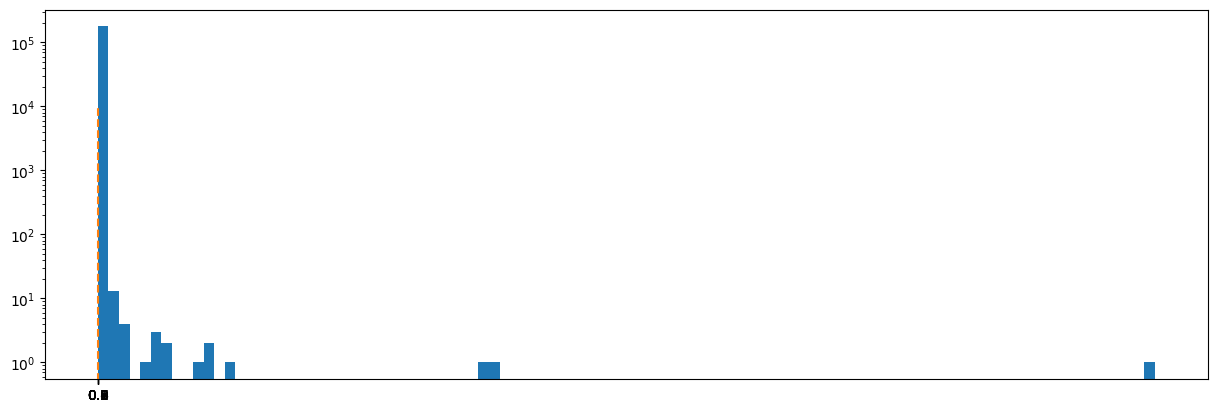

In [17]:
###### parameters #################
ph_threshold = 50                 #
ratio_threshold = 0.1            #
###################################

label = np.zeros(inner_ph_in.shape[0])

for i in np.where( (inner_ratio > ratio_threshold) & (inner_ph_in > ph_threshold) )[0]:
    label[i] = 1
    
n_blind = label[label==1].shape[0]
n_not_blind = label[label==0].shape[0]
print('labelled-blind cameras :', n_blind)

# add pixel saturation
data_in[data_in > 1000] = 1000

fig = plt.figure()
plt.hist(inner_ratio, 100)
plt.yscale('log')
plt.xticks(np.arange(0, 1, 0.1))
plt.plot([ratio_threshold, ratio_threshold],[0,1e4], '--')
fig.set_figwidth(15)

### Testing different values for labelling data

C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4009198526.py:7: RuntimeWarning: invalid value encountered in divide
  _ratio = 1 - _mean/_max


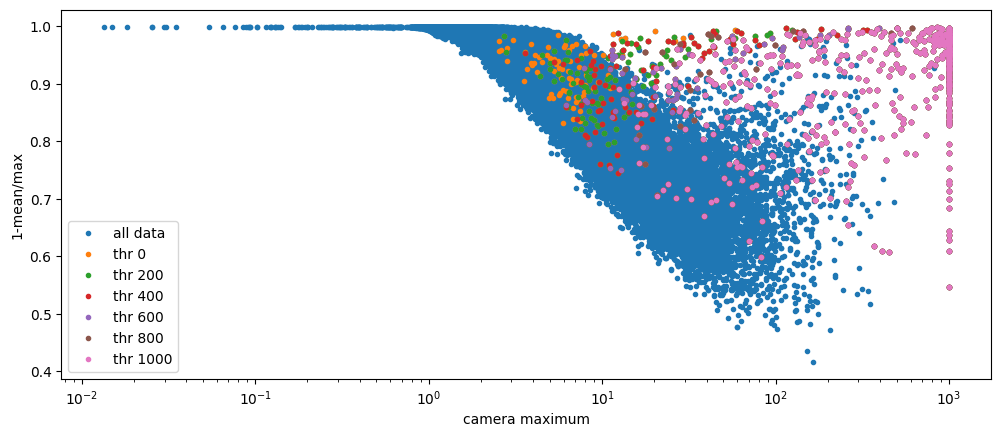

In [18]:
fig = plt.figure()

_amp = np.sum(data_in, axis=1)
_max = np.max(data_in, axis=1)
_mean = np.mean(data_in, axis=1)

_ratio = 1 - _mean/_max

_ratio[np.isnan(_ratio)] = 1

plt.plot(_max, _ratio, '.', label='all data')

for thr in range(0, 1200, 200):
    lab = np.zeros(inner_ph_in.shape[0])
    for i in np.where( (inner_ratio > ratio_threshold) & (inner_ph_in > thr) )[0]:
        lab[i] = 1
    plt.plot(_max[lab == 1], _ratio[lab == 1], '.', label='thr '+str(thr))
    
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('1-mean/max')
plt.legend()
fig.set_figwidth(12)

C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\3249598680.py:7: RuntimeWarning: invalid value encountered in divide
  _ratio = 1 - _mean/_max


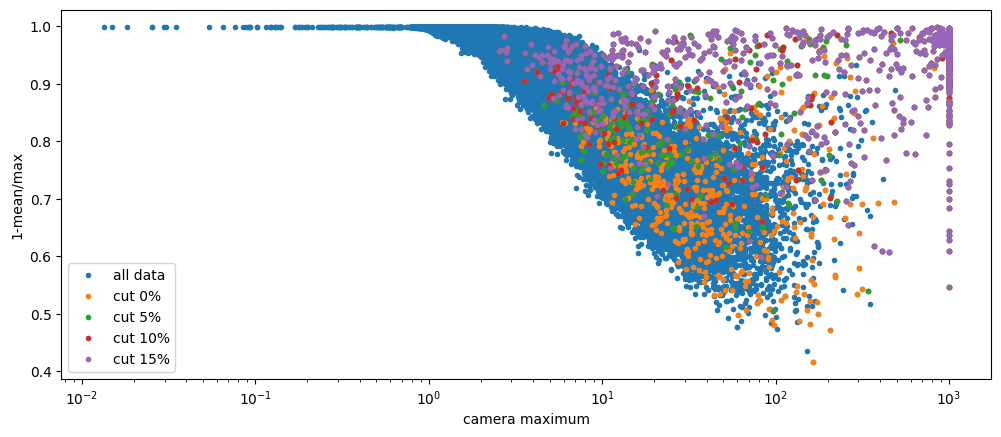

In [19]:
fig = plt.figure()

_amp = np.sum(data_in, axis=1)
_max = np.max(data_in, axis=1)
_mean = np.mean(data_in, axis=1)

_ratio = 1 - _mean/_max

_ratio[np.isnan(_ratio)] = 1

plt.plot(_max, _ratio, '.', label='all data')
thr = 50
for cut in range(0, 20, 5):
    # for thr in range(0, 1000, 200):
    lab = np.zeros(inner_ph_in.shape[0])
    for i in np.where( (inner_ratio > (cut/100)) & (inner_ph_in > thr))[0]:
        lab[i] = 1
    plt.plot(_max[lab == 1], _ratio[lab == 1], '.', label='cut '+str(cut)+'%')
    
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('1-mean/max')
plt.legend()
fig.set_figwidth(12)

### Split into test and training sets

In [20]:
sep = int(data_in.shape[0] * 0.8)

train_data, test_data = data_in[:sep], data_in[sep:] #normalize_data[:800], normalize_data[800:]
train_label, test_label = label[:sep], label[sep:]

print(train_data.shape)
print(train_label.shape)

(142400, 1024)
(142400,)


### Data augmentation for dazzled dataset

In [21]:
train_blind = train_data[np.where(train_label==1)]
train_not_blind = train_data[np.where(train_label==0)]

rdm = np.random.default_rng(12345)
rdm_x = rdm.integers(low=0, high=31, size=int(0.3*n_not_blind))
rdm_y = rdm.integers(low=0, high=31, size=int(0.3*n_not_blind))
artificial_train_blind = np.repeat(train_blind, int(0.3*n_not_blind/train_blind.shape[0]), axis=0).reshape(-1, cam_side_length, cam_side_length, 1)
for r in range(artificial_train_blind.shape[0]) :
    artificial_train_blind[r] = np.roll(artificial_train_blind[r], (rdm_x[r] ,rdm_y[r]), axis=(2,1))
    
artificial_train_label = np.ones(artificial_train_blind.shape[0])

print('blind cameras - total data ratio:',(len(artificial_train_label) + len(train_label[train_label == 1]))/len(train_label))

# train_data = train_data.reshape(-1, cam_side_length, cam_side_length, 1)
# test_data = test_data.reshape(-1, cam_side_length, cam_side_length, 1)

# train_data /= renormalisation
# test_data /= renormalisation

# train_label = train_label.flatten()
# test_label = test_label.flatten()

train_data = np.append(train_data, artificial_train_blind.reshape(-1, cam_side_length**2),axis=0)
train_label = np.append(train_label, artificial_train_label)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

#train_data = random.shuffle(train_data, 25)

# train_label_ohe = to_categorical(train_label,2)
# test_label_ohe = to_categorical(test_label,2)

# train_label_ohe.shape

blind cameras - total data ratio: 0.374873595505618


## Feature Extraction

In [22]:
train_amp = np.sum(train_data, axis=1)
test_amp = np.sum(test_data, axis=1)
train_max = np.max(train_data, axis=1)
test_max = np.max(test_data, axis=1)
train_mean = np.mean(train_data, axis=1)
test_mean = np.mean(test_data, axis=1)

test_ratio = 1 - test_mean/test_max
train_ratio = 1 - train_mean/train_max

test_ratio[np.isnan(test_ratio)] = 1
train_ratio[np.isnan(train_ratio)] = 1

train_arr = np.column_stack((train_ratio, train_max))
test_arr = np.column_stack((test_ratio, test_max))

C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4026788037.py:8: RuntimeWarning: invalid value encountered in divide
  test_ratio = 1 - test_mean/test_max
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\4026788037.py:9: RuntimeWarning: invalid value encountered in divide
  train_ratio = 1 - train_mean/train_max


### Plot data features

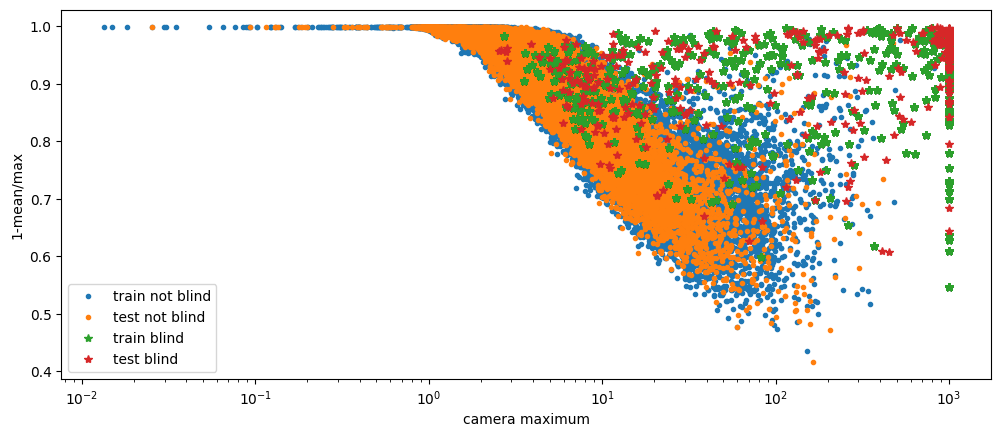

In [23]:
# plt.plot(lab_not_bl_max, 1-ratio_not_bl_lab, '.', label='lab not blind')
#ax[0].plot(lab_bl_max, 1-ratio_bl_lab, 'o', label='lab blind')
plt.figure().set_figwidth(12)
plt.plot(train_max[train_label == 0], train_ratio[train_label == 0], '.', label='train not blind')
plt.plot(test_max[test_label == 0], test_ratio[test_label == 0], '.', label='test not blind')
plt.plot(train_max[train_label == 1], train_ratio[train_label == 1], '*', label='train blind')
plt.plot(test_max[test_label == 1], test_ratio[test_label == 1], '*', label='test blind')

# ax[0].yscale('log')
plt.xscale('log')
plt.xlabel('camera maximum')
plt.ylabel('1-mean/max')
plt.legend()



## Build the model

### Model 1

In [24]:
sgd_clf = SGDClassifier(max_iter=2000, tol=1e-3, random_state=42)
sgd_clf.fit(train_arr, train_label)

sgd_score = sgd_clf.score(test_arr, test_label)
cross_score = cross_val_score(sgd_clf, test_arr, test_label, cv=2, scoring="precision")
pred_label = cross_val_predict(sgd_clf, test_arr, test_label, cv=2)

cm = confusion_matrix(pred_label, test_label)
prec = precision_score(pred_label, test_label)
reca = recall_score(pred_label, test_label)
f1 = f1_score(pred_label, test_label)
    
print('confusion matrix :')
print(cm)
print('precision :', prec)
print('recall :', reca)
print('f1 score :', f1)

confusion matrix :
[[35206   168]
 [   39   187]]
precision : 0.5267605633802817
recall : 0.827433628318584
f1 score : 0.6437177280550773


### Model 2

In [25]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
LM = LogisticRegression() #LinearRegression()
# scoring = 'neg_mean_absolute_error'                                  # <---
cross_score_LM = cross_val_score(LM, test_arr, test_label, cv=kfold, scoring='neg_mean_absolute_error')
pred_label_LM = cross_val_predict(LM, test_arr, test_label, cv=kfold)

cm_LM = confusion_matrix(pred_label_LM, test_label)
prec_LM = precision_score(pred_label_LM, test_label)
reca_LM = recall_score(pred_label_LM, test_label)
f1_LM = f1_score(pred_label_LM, test_label)
    
print('kfold :', kfold)
print('confusion matrix :')
print(cm_LM)
print('precision :', prec_LM)
print('recall :', reca_LM)
print('f1 score :', f1_LM)

kfold : KFold(n_splits=10, random_state=7, shuffle=True)
confusion matrix :
[[35228   181]
 [   17   174]]
precision : 0.49014084507042255
recall : 0.9109947643979057
f1 score : 0.6373626373626373


### Prediction vs MC truth visualization

#### Model 1

C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\613414058.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred_bl_mod = stats.mode(pred_bl, axis=1)[0].ravel()
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\613414058.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warn

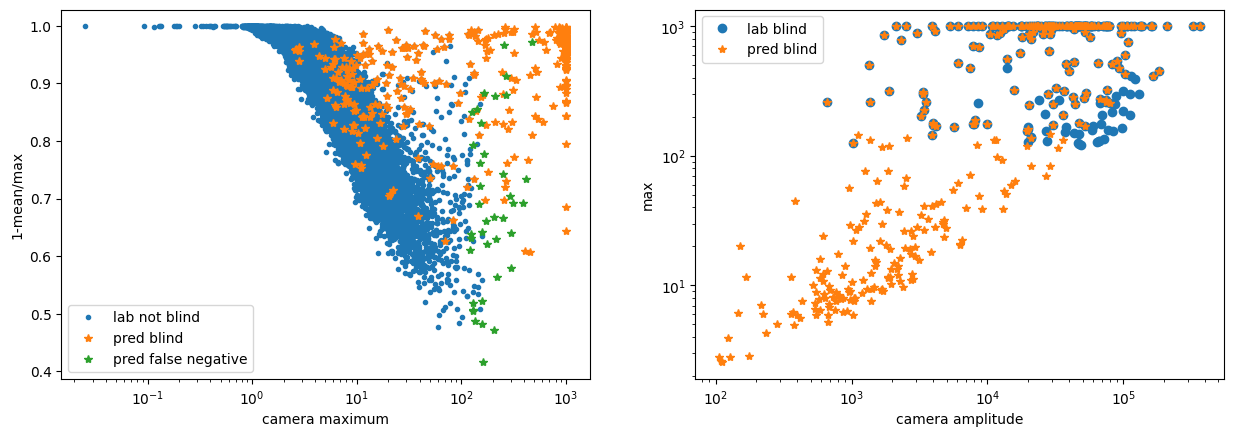

In [26]:
test_d = data_in[sep:]
#test_d = MaxAbsScaler().fit_transform(data_in[sep:])

lab_bl = test_d[np.where(pred_label==1)]
lab_not_bl = test_d[np.where(pred_label==0)]
pred_bl = test_d[np.where(test_label==1)]
pred_not_bl = test_d[np.where(test_label==0)]
pred_fn = test_d[np.intersect1d(np.where(pred_label==1), np.where(test_label==0))]

lab_not_bl_amp = np.sum(lab_not_bl, axis=1)
lab_bl_amp = np.sum(lab_bl, axis=1)
pred_bl_amp = np.sum(pred_bl, axis=1)
pred_not_bl_amp = np.sum(pred_not_bl, axis=1)
pred_fn_amp = np.sum(pred_fn, axis=1)
pred_bl_mod = stats.mode(pred_bl, axis=1)[0].ravel()
lab_not_bl_mod = stats.mode(lab_not_bl, axis=1)[0].ravel()
pred_fn_mod = stats.mode(pred_fn, axis=1)[0].ravel()

lab_not_bl_max = np.max(lab_not_bl, axis=1)
lab_bl_max = np.max(lab_bl, axis=1)
pred_bl_max = np.max(pred_bl, axis=1)
pred_not_bl_max = np.max(pred_not_bl, axis=1)
pred_fn_max = np.max(pred_fn, axis=1)

lab_not_bl_mean = np.mean(lab_not_bl, axis=1)
lab_bl_mean = np.mean(lab_bl, axis=1)
pred_bl_mean = np.mean(pred_bl, axis=1)
pred_not_bl_mean = np.mean(pred_not_bl, axis=1)
pred_fn_mean = np.mean(pred_fn, axis=1)

ratio_bl_lab = lab_bl_mean/lab_bl_max
ratio_not_bl_lab = lab_not_bl_mean/lab_not_bl_max
ratio_bl_pred = pred_bl_mean/pred_bl_max
ratio_not_bl_pred = pred_not_bl_mean/pred_not_bl_max
ratio_fn_pred = pred_fn_mean/pred_fn_max

fig, ax = plt.subplots(1,2)
ax[0].plot(lab_not_bl_max, 1-ratio_not_bl_lab, '.', label='lab not blind')
#ax[0].plot(lab_bl_max, 1-ratio_bl_lab, 'o', label='lab blind')
ax[0].plot(pred_bl_max, 1-ratio_bl_pred, '*', label='pred blind')
ax[0].plot(pred_fn_max, 1-ratio_fn_pred, '*', label='pred false negative')
# ax[0].yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('camera maximum')
ax[0].set_ylabel('1-mean/max')
ax[0].legend()

ax[1].plot(lab_bl_amp, lab_bl_max, 'o', label='lab blind')
ax[1].plot(pred_bl_amp, pred_bl_max, '*', label='pred blind')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('camera amplitude')
ax[1].set_ylabel('max')
ax[1].legend()

# ax[1,0].plot(lab_not_bl_amp, 1-ratio_not_bl_lab, '.', label='lab not blind')
# #ax[0].plot(lab_bl_max, 1-ratio_bl_lab, 'o', label='lab blind')
# ax[1,0].plot(pred_bl_amp, 1-ratio_bl_pred, '*', label='pred blind')
# ax[1,0].plot(pred_fn_amp, 1-ratio_fn_pred, '*', label='pred false negative')
# # ax[0].yscale('log')
# ax[1,0].set_xscale('log')
# ax[1,0].set_xlabel('camera amplitude')
# ax[1,0].set_ylabel('1-mean/max')
# ax[1,0].legend()

# ax[1,1].plot(lab_not_bl_mod, lab_not_bl_max, '.', label='lab not blind')
# ax[1,1].plot(pred_bl_mod, pred_bl_max, '*', label='pred blind')
# ax[1,1].plot(pred_fn_mod, pred_fn_max, '*', label='pred false negative')

# ax[1,1].set_yscale('log')
# ax[1,1].set_xscale('log')
# ax[1,1].set_xlabel('camera mode')
# ax[1,1].set_ylabel('camera max')
# ax[1,1].legend()

fig.set_figwidth(15)
# fig.set_figheight(10)

#### Model 2

C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\3961742673.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred_bl_mod = stats.mode(pred_bl, axis=1)[0].ravel()
C:\Users\Pc\AppData\Local\Temp\ipykernel_3368\3961742673.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this wa

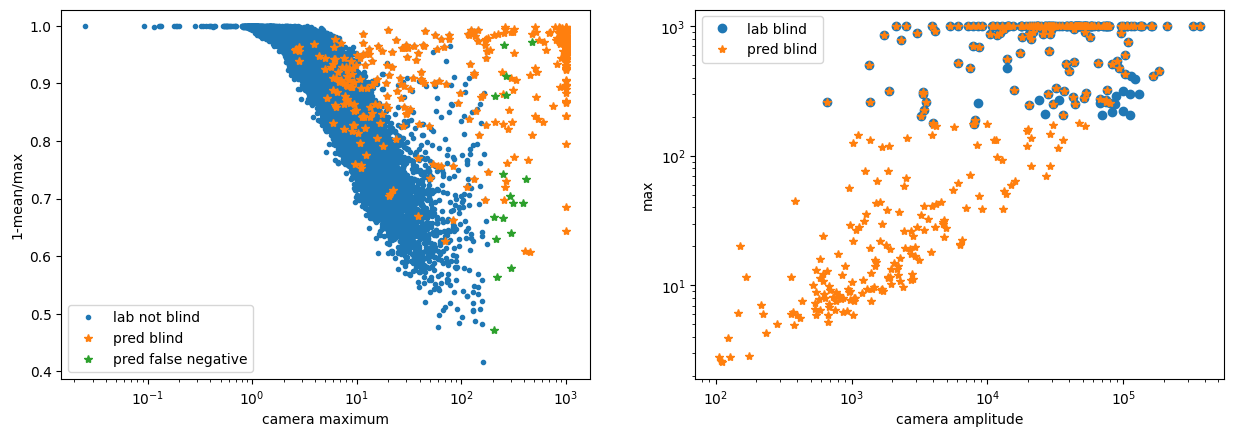

In [27]:
test_d = data_in[sep:]
#test_d = MaxAbsScaler().fit_transform(data_in[sep:])

lab_bl = test_d[np.where(pred_label_LM==1)]
lab_not_bl = test_d[np.where(pred_label_LM==0)]
pred_bl = test_d[np.where(test_label==1)]
pred_not_bl = test_d[np.where(test_label==0)]
pred_fn = test_d[np.intersect1d(np.where(pred_label_LM==1), np.where(test_label==0))]

lab_not_bl_amp = np.sum(lab_not_bl, axis=1)
lab_bl_amp = np.sum(lab_bl, axis=1)
pred_bl_amp = np.sum(pred_bl, axis=1)
pred_not_bl_amp = np.sum(pred_not_bl, axis=1)
pred_fn_amp = np.sum(pred_fn, axis=1)
pred_bl_mod = stats.mode(pred_bl, axis=1)[0].ravel()
lab_not_bl_mod = stats.mode(lab_not_bl, axis=1)[0].ravel()
pred_fn_mod = stats.mode(pred_fn, axis=1)[0].ravel()

lab_not_bl_max = np.max(lab_not_bl, axis=1)
lab_bl_max = np.max(lab_bl, axis=1)
pred_bl_max = np.max(pred_bl, axis=1)
pred_not_bl_max = np.max(pred_not_bl, axis=1)
pred_fn_max = np.max(pred_fn, axis=1)

lab_not_bl_mean = np.mean(lab_not_bl, axis=1)
lab_bl_mean = np.mean(lab_bl, axis=1)
pred_bl_mean = np.mean(pred_bl, axis=1)
pred_not_bl_mean = np.mean(pred_not_bl, axis=1)
pred_fn_mean = np.mean(pred_fn, axis=1)

ratio_bl_lab = lab_bl_mean/lab_bl_max
ratio_not_bl_lab = lab_not_bl_mean/lab_not_bl_max
ratio_bl_pred = pred_bl_mean/pred_bl_max
ratio_not_bl_pred = pred_not_bl_mean/pred_not_bl_max
ratio_fn_pred = pred_fn_mean/pred_fn_max

fig, ax = plt.subplots(1,2)
ax[0].plot(lab_not_bl_max, 1-ratio_not_bl_lab, '.', label='lab not blind')
#ax[0].plot(lab_bl_max, 1-ratio_bl_lab, 'o', label='lab blind')
ax[0].plot(pred_bl_max, 1-ratio_bl_pred, '*', label='pred blind')
ax[0].plot(pred_fn_max, 1-ratio_fn_pred, '*', label='pred false negative')
# ax[0].yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel('camera maximum')
ax[0].set_ylabel('1-mean/max')
ax[0].legend()

ax[1].plot(lab_bl_amp, lab_bl_max, 'o', label='lab blind')
ax[1].plot(pred_bl_amp, pred_bl_max, '*', label='pred blind')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('camera amplitude')
ax[1].set_ylabel('max')
ax[1].legend()

# ax[1,0].plot(lab_not_bl_amp, 1-ratio_not_bl_lab, '.', label='lab not blind')
# #ax[0].plot(lab_bl_max, 1-ratio_bl_lab, 'o', label='lab blind')
# ax[1,0].plot(pred_bl_amp, 1-ratio_bl_pred, '*', label='pred blind')
# ax[1,0].plot(pred_fn_amp, 1-ratio_fn_pred, '*', label='pred false negative')
# # ax[0].yscale('log')
# ax[1,0].set_xscale('log')
# ax[1,0].set_xlabel('camera amplitude')
# ax[1,0].set_ylabel('1-mean/max')
# ax[1,0].legend()

# ax[1,1].plot(lab_not_bl_mod, lab_not_bl_max, '.', label='lab not blind')
# ax[1,1].plot(pred_bl_mod, pred_bl_max, '*', label='pred blind')
# ax[1,1].plot(pred_fn_mod, pred_fn_max, '*', label='pred false negative')

# ax[1,1].set_yscale('log')
# ax[1,1].set_xscale('log')
# ax[1,1].set_xlabel('camera mode')
# ax[1,1].set_ylabel('camera max')
# ax[1,1].legend()

fig.set_figwidth(15)
# fig.set_figheight(10)